In [40]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
#%%
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [41]:
data = pd.read_csv(r"Salary_Data.csv") # real
data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<Figure size 700x700 with 0 Axes>

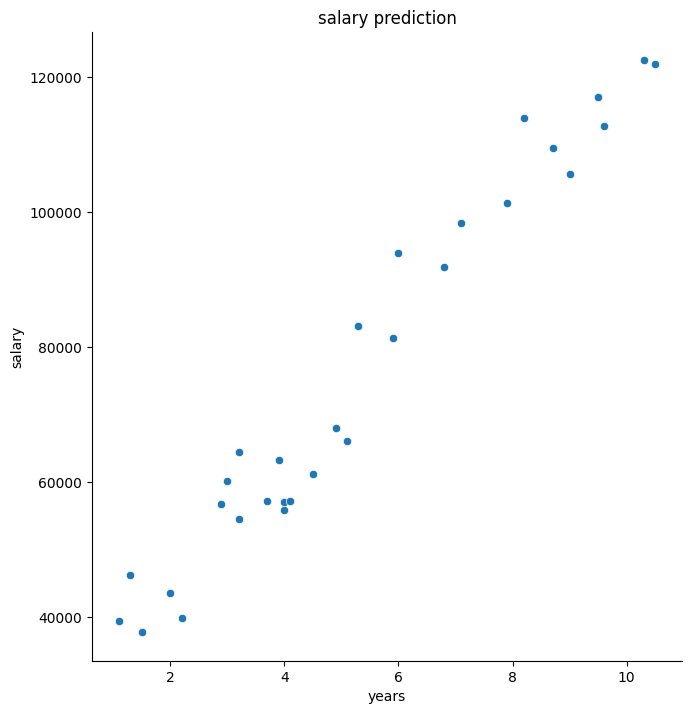

In [42]:
#%%
plt.figure(figsize=(7,7))
# plt.scatter(data['YearsExperience'],data['Salary'])
sns.pairplot(data,x_vars=["YearsExperience"],y_vars=["Salary"],size=7,kind="scatter")
plt.xlabel("years")
plt.ylabel("salary")
plt.title("salary prediction")
plt.show()


In [44]:
#%%
# cooking the data 
X = data.iloc[:,:-1]
y = data.iloc[:,1]


X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.8,random_state = 10)
print(y_train)



13     57081.0
27    112635.0
12     56957.0
1      46205.0
19     93940.0
14     61111.0
18     81363.0
6      60150.0
11     55794.0
23    113812.0
24    109431.0
28    122391.0
22    101302.0
10     63218.0
26    116969.0
29    121872.0
8      64445.0
25    105582.0
16     66029.0
17     83088.0
0      39343.0
15     67938.0
4      39891.0
9      57189.0
Name: Salary, dtype: float64


In [45]:

my_model = LinearRegression()
my_model.fit(X_train,y_train)

LinearRegression()

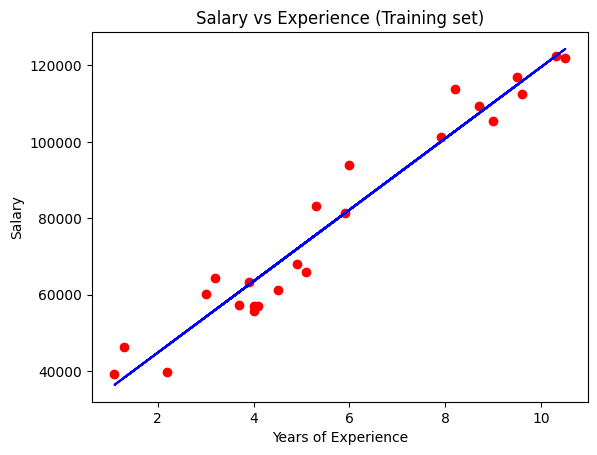

In [46]:
#%%
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train ,my_model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


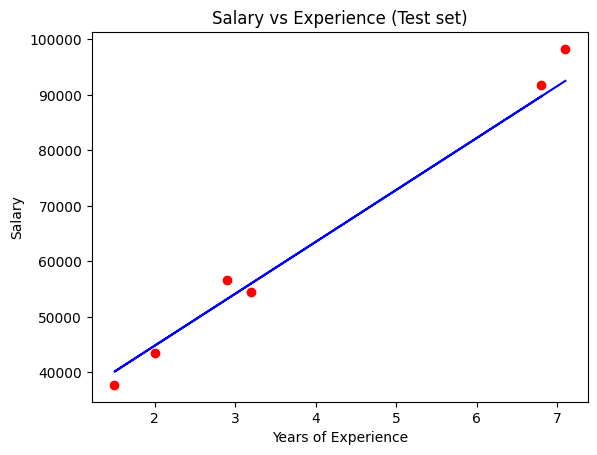

In [47]:
#%%
y_pred = my_model.predict(X_test)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
#%%


In [48]:
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)
# Calculate R square vale
rsq = r2_score(y_test,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)
#%%
# Intecept and coeff of the line
print('Intercept of the model:',my_model.intercept_)#b
print('Coefficient of the line:',my_model.coef_)#w

y_hat = 9357 * 7 +  26089 
print(y_hat)

mean squared error : 9785570.138914317
r square : 0.9816423482070253
Intercept of the model: 26089.096632416724
Coefficient of the line: [9356.86299354]
91588


In [38]:
from tkinter import *
from tkinter import ttk, messagebox
from datetime import datetime

import pandas as pd
import numpy as np


class Am_ML:
    def __init__(self, root):
        self.root = root
        self.root.geometry("1350x700+0+0")
        self.root.title("House Price Prediction")
        self.root.configure(bg="Light Yellow")
        # now = datetime.now()
        # current_date = now.strftime("%Y-%m-%d")
        # current_time = now.strftime("%H:%M:%S")

        # Title Label
        title = Label(self.root, text="Salary prediction App", compound=CENTER,
                      font=("times new roman", 40, "bold"), bg="#010c48", fg="white", anchor="w", padx=20)
        title.place(x=0, y=0, relwidth=1, height=70)


        frame1 = LabelFrame(self.root, text="Input Features", font=("times new roman", 16,"bold"), bg="White", fg="black")
        frame1.place(x=20, y=120, width=400, height=550)
        
        frame2 = LabelFrame(self.root, font=("times new roman", 25,"bold"), bg="gray", fg="black")
        frame2.place(x=200, y=120, width=800, height=550)

        Label(frame1, text="Enter Features:", font=("times new roman", 14)).place(x=10, y=20)
        Label(frame2 ,text="Salary prediction", font=("times new roman", 20)).place(x=300, y=20)
        Label(frame2 ,text="Enter years of experience:", font=("times new roman", 18)).place(x=280, y=80)
        
        self.entry = Entry(self.root,font=("times new roman", 14))
        self.entry.pack(pady=10)
        self.entry.place(x="515",y="250")
        
        btn1=Button(frame2,text="Excute",font="Arial 15 bold",fg="black",bg="pink",padx="6",bd="5",pady="15",command=self.predict)
        btn1.place(x="350",y="160")
        
        self.result_label=Label(self.root,text="", font=("times new roman", 18))
        self.result_label.place(x=450, y=380)
         
    def predict(self):
        try: 
            x = float(self.entry.get())
            y = 9357 * x +  26089 

            # Display the entered value in the result_label
            self.result_label.config(text=f"Your expected salary is: {y}")
        except ValueError:
            self.result_label.config(text=f"Enter a float number:")    
            
        
            

if __name__ == "__main__":
    root = Tk()
    obj = Am_ML(root)
    root.mainloop()

